In [ ]:
#!pip install -U sentence-transformers
#!pip install hdbscan

In [1]:
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer

import umap
import hdbscan
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
import csv
def extract_text(brand):
    df = pd.read_csv("Final_Project_Data/"+brand+"_Desc_Count.csv")["body"]
    df.dropna(inplace = True)
    max_length = 0
    for review in df:
        max_length = max(max_length, len(review.split()))
    print(max_length)
    print(df.shape)
    return df

def extract_sentence(brand):
    sentence_list = []
    with open("Final_Project_Data/"+brand+"_Desc_Count.csv") as brand:
            reader = csv.reader(brand)
            for line in reader:
                try:
                    sentence = line[2].split(".")
                except:
                    print("line {} not read".format(i))
                sentence_list += sentence
    sentence_list = list(filter(None, sentence_list))
    return sentence_list

In [3]:
brand_list = ["Audi", "BMW", "BoltEV", "Leaf", "Mercedes", "Tesla"]
sentence_dict = {}
for brand in brand_list:
    sentence_dict[brand] = extract_sentence(brand)

In [4]:
np.random.seed(0)
ran = np.random.choice(range(18222), 10, replace=False)

In [5]:
rand_seed = [0, 1, 2, 3, 4, 5]
sample_dict = {}
for i in rand_seed:
    np.random.seed(rand_seed)
    for brand in brand_list:
        rand = np.random.choice(range(len(sentence_dict[brand])), 10000, replace = False).tolist()
        sample_dict[brand] = list(sentence_dict[brand][i] for i in rand)

In [6]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embed_dict = {}
for brand in brand_list:
    embed_dict[brand] = model.encode(sample_dict[brand], show_progress_bar=True)

In [7]:
umap_dict = {}
for brand in brand_list:
    umap_dict[brand] = umap.UMAP(metric='cosine').fit_transform(embed_dict[brand])

In [8]:
cluster_dict = {}
for brand in brand_list:
    cluster_dict[brand] = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_dict[brand])

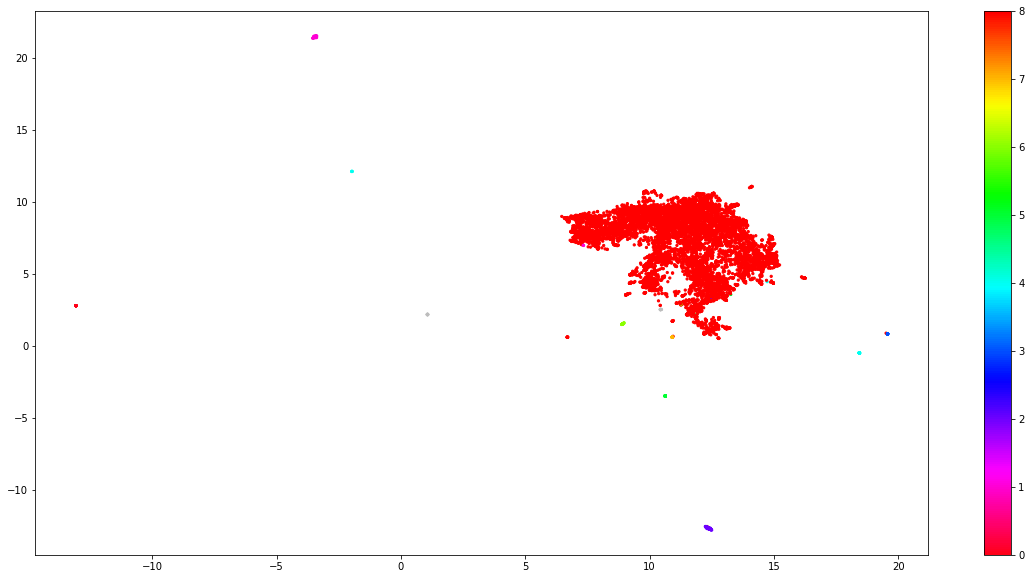

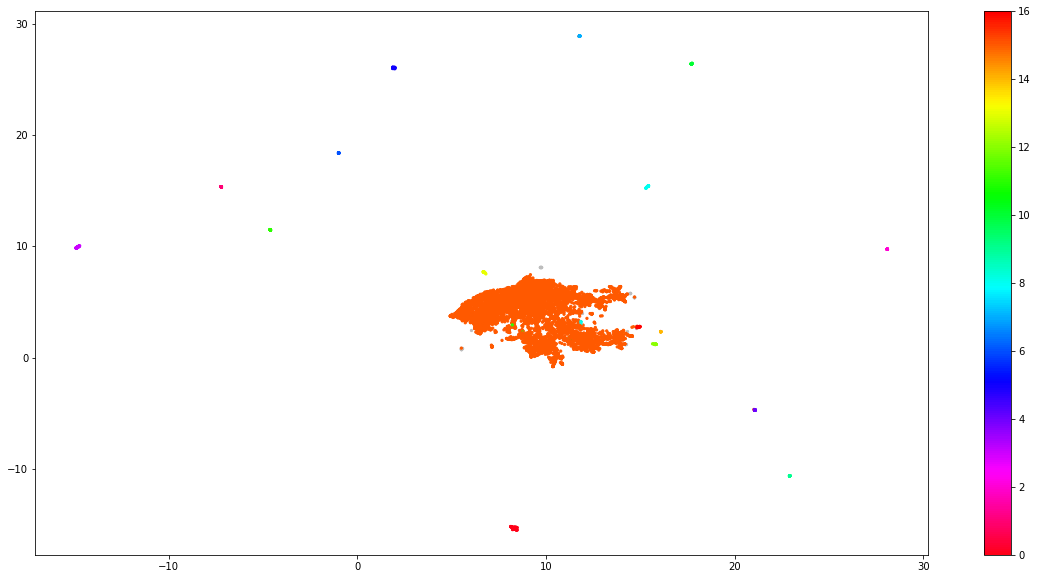

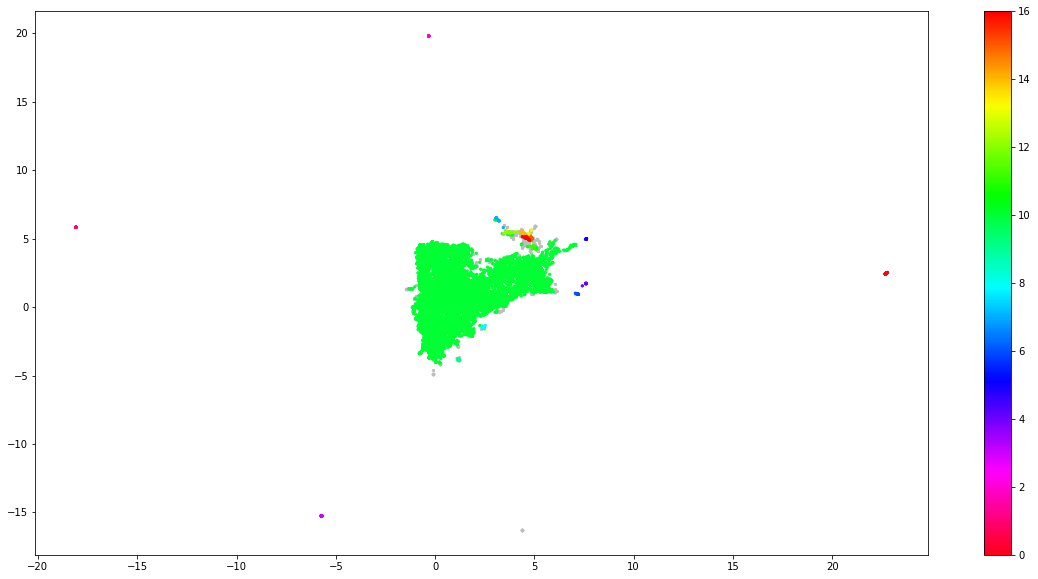

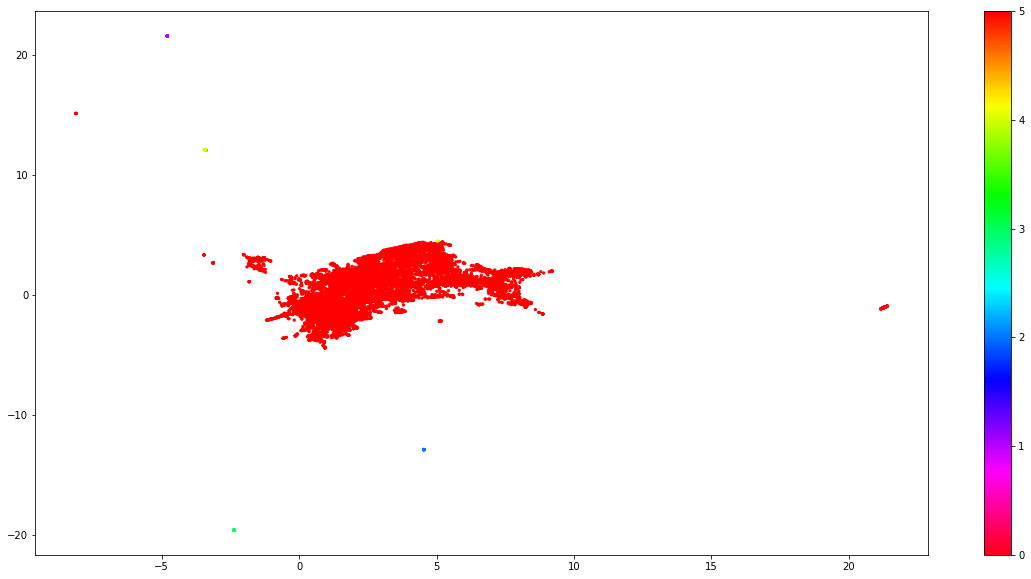

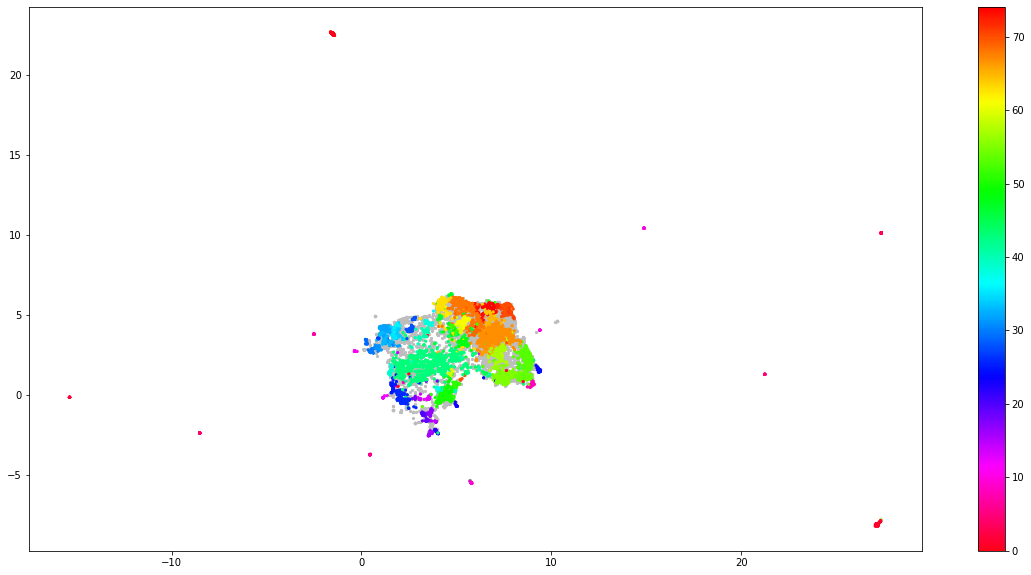

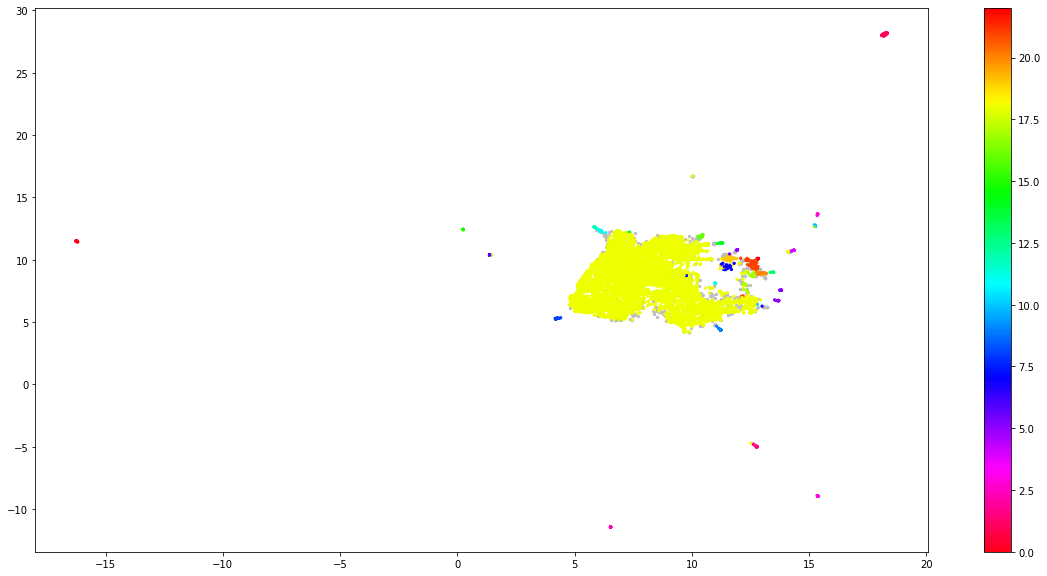

In [42]:
result_dict = {}
for brand in brand_list:
    umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embed_dict[brand])
    result_dict[brand] = pd.DataFrame(umap_data, columns=['x', 'y'])
    result_dict[brand]['labels'] = cluster_dict[brand].labels_
    
    fig, ax = plt.subplots(figsize=(20, 10))
    outliers = result_dict[brand].loc[result_dict[brand].labels == -1, :]
    clustered = result_dict[brand].loc[result_dict[brand].labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, cmap='hsv_r')
    plt.colorbar()

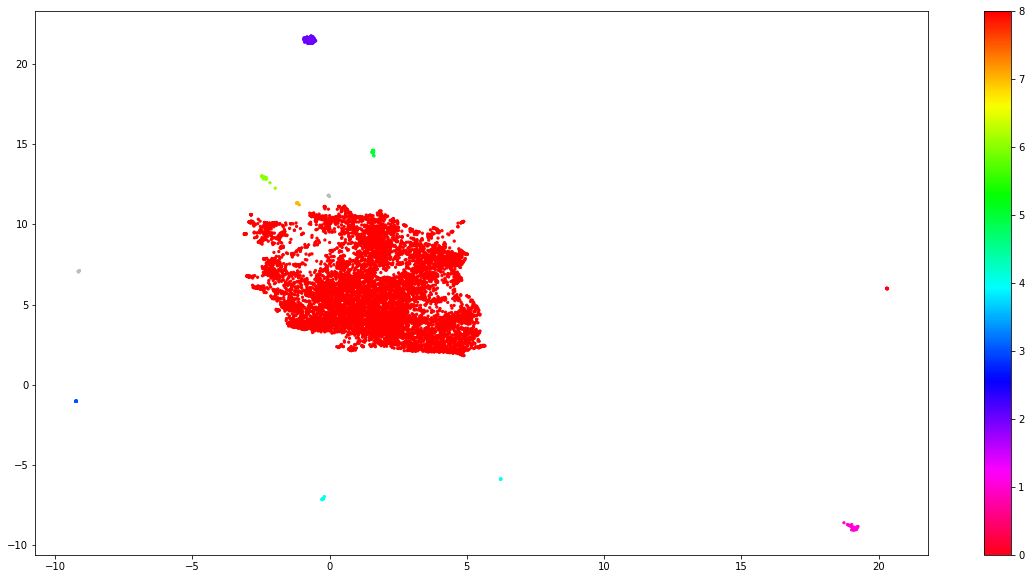

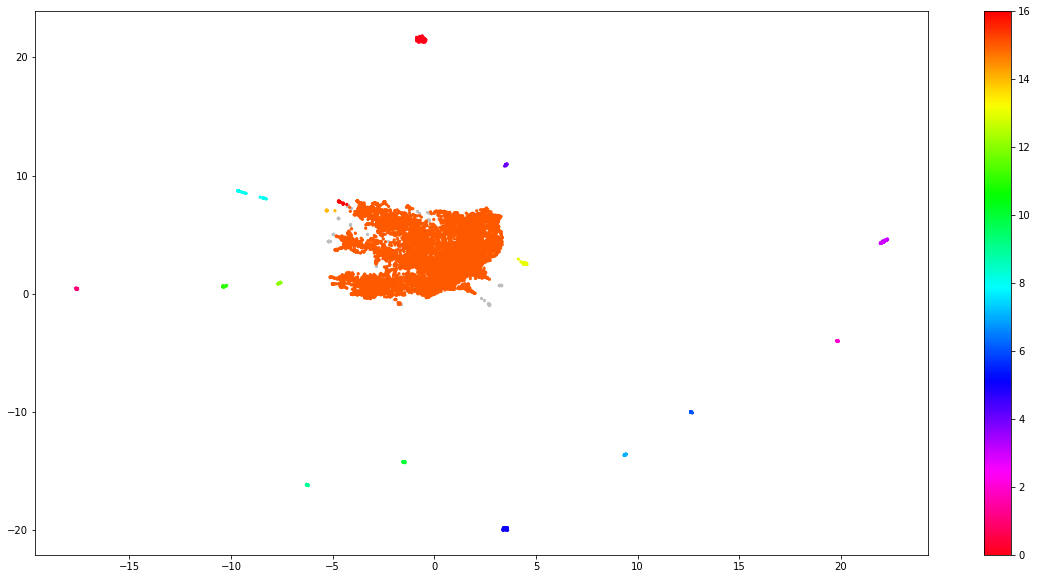

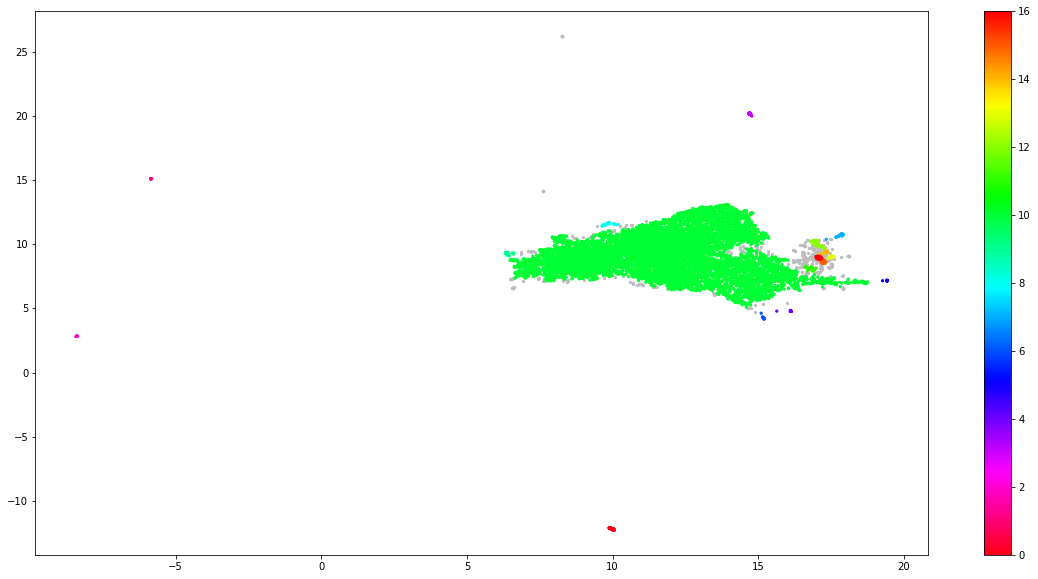

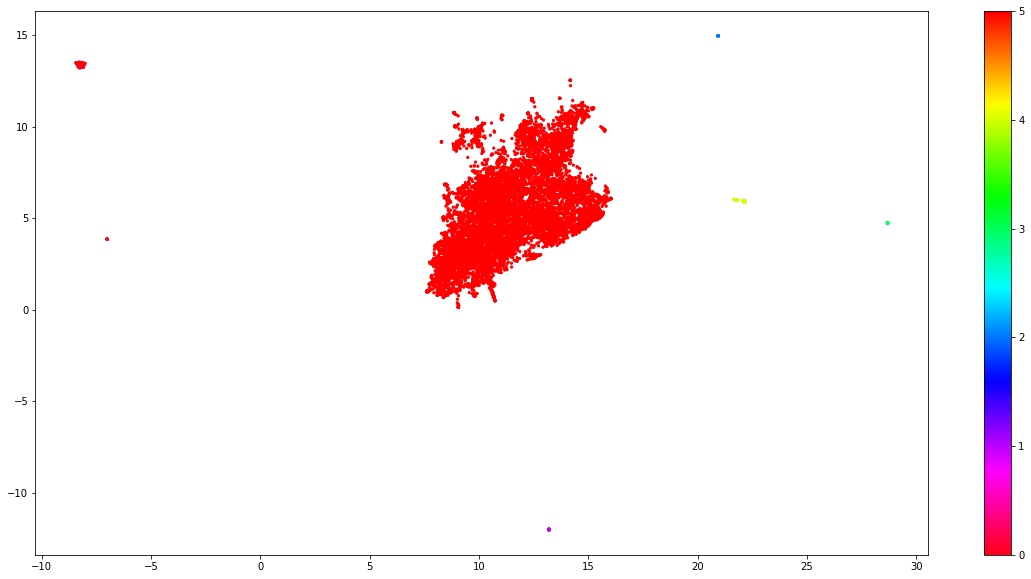

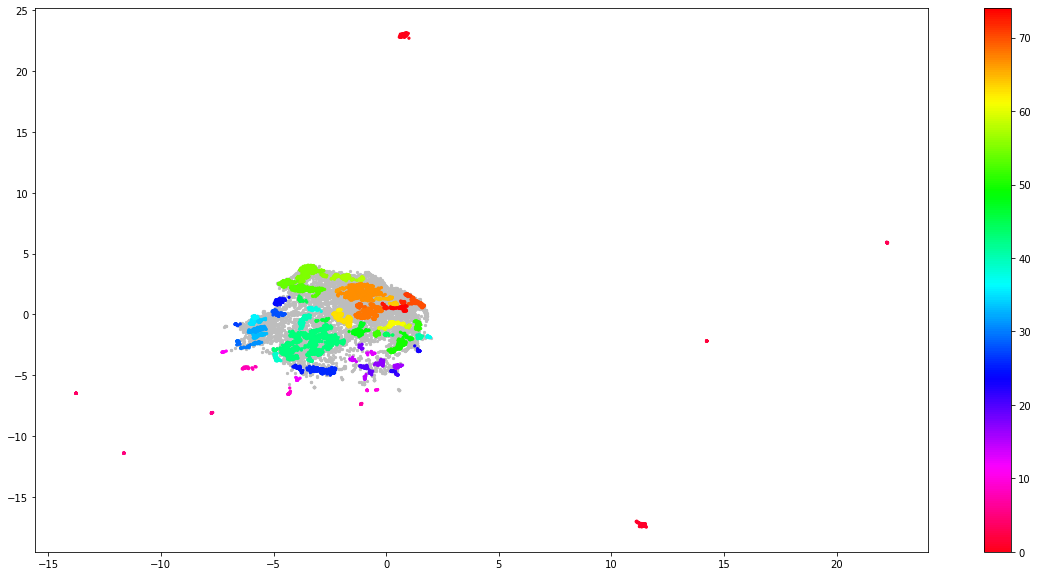

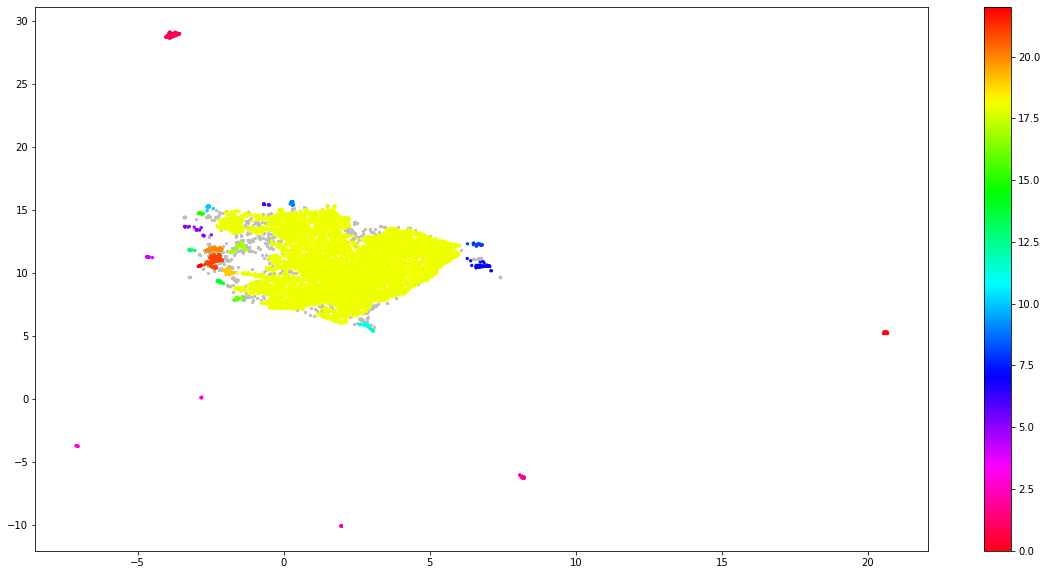

In [9]:
result_dict = {}
for brand in brand_list:
    result_dict[brand] = pd.DataFrame(umap_dict[brand], columns=['x', 'y'])
    result_dict[brand]['labels'] = cluster_dict[brand].labels_
    
    fig, ax = plt.subplots(figsize=(20, 10))
    outliers = result_dict[brand].loc[result_dict[brand].labels == -1, :]
    clustered = result_dict[brand].loc[result_dict[brand].labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, cmap='hsv_r')
    plt.colorbar()

In [10]:
df_dict = {}
topic_dict = {}
for brand in brand_list:
    df_dict[brand] = pd.DataFrame(sample_dict[brand], columns=["Doc"])
    df_dict[brand]['Topic'] = cluster_dict[brand].labels_
    df_dict[brand]['Doc_ID'] = range(len(df_dict[brand]))
    topic_dict[brand] = df_dict[brand].groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [11]:
topic_dict

{'Audi':    Topic                                                Doc
 0     -1  F html google html) wikipedia google html) htm...
 1      0  reddit reddit reddit reddit reddit reddit redd...
 2      1  [deleted] [deleted] [deleted] [deleted]  Turne...
 3      2                 \n\n                   \n      ...
 4      3  jpg jpg) jpg Photo game on point 👍 jpg jpg) jp...
 5      4  \n\nThanks! Please and thanks  Thanks!\n   Tha...
 6      5  or wagons 😔  🤔 (☞ﾟヮﾟ)☞ 😂😂😂   This will do for ...
 7      6   The 2 2 It's for cassette tapes A tuned 2  St...
 8      7  imgur imgur imgur imgur imgur imgur imgur imgu...
 9      8  Must be photo shopped /s \n\n&#x200B;\n\n[www ...,
 'BMW':     Topic                                                Doc
 0      -1  jpg) | [1 comment](https://np jpg](https://i F...
 1       0                     \n                         ...
 2       1  com/r/BMW/comments/9hhnru/rbmw_self_promotion_...
 3       2   Please [message the moderators](https://www  ...
 4 

In [12]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [13]:
tf_idf1, count1 = c_tf_idf(topic_dict["Audi"].Doc.values, m=len(sample_dict["Audi"]))
tf_idf2, count2 = c_tf_idf(topic_dict["BMW"].Doc.values, m=len(sample_dict["BMW"]))
tf_idf3, count3 = c_tf_idf(topic_dict["BoltEV"].Doc.values, m=len(sample_dict["BoltEV"]))
tf_idf4, count4 = c_tf_idf(topic_dict["Leaf"].Doc.values, m=len(sample_dict["Leaf"]))
tf_idf5, count5 = c_tf_idf(topic_dict["Mercedes"].Doc.values, m=len(sample_dict["Mercedes"]))
tf_idf6, count6 = c_tf_idf(topic_dict["Tesla"].Doc.values, m=len(sample_dict["Tesla"]))

In [14]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

In [18]:
# Audi
top_n_words1 = extract_top_n_words_per_topic(tf_idf1, count1, topic_dict["Audi"], n=20)
topic_sizes1 = extract_topic_sizes(df_dict["Audi"]); topic_sizes1.head(10)

,Topic,Size
9,8,9346
3,2,242
2,1,193
7,6,53
6,5,41
5,4,34
0,-1,27
8,7,24
4,3,23
1,0,17


In [19]:
# BMW
top_n_words2 = extract_top_n_words_per_topic(tf_idf2, count2, topic_dict["BMW"], n=20)
topic_sizes2 = extract_topic_sizes(df_dict["BMW"]); topic_sizes2.head(10)

,Topic,Size
16,15,8682
1,0,244
6,5,188
4,3,163
11,10,72
0,-1,70
8,7,62
14,13,60
2,1,59
5,4,58


In [20]:
# BoltEV
top_n_words3 = extract_top_n_words_per_topic(tf_idf3, count3, topic_dict["BoltEV"], n=20)
topic_sizes3 = extract_topic_sizes(df_dict["BoltEV"]); topic_sizes3.head(10)

,Topic,Size
11,10,9009
0,-1,410
1,0,127
4,3,63
13,12,61
17,16,48
8,7,34
7,6,27
12,11,27
16,15,27


In [21]:
# Leaf
top_n_words4 = extract_top_n_words_per_topic(tf_idf4, count4, topic_dict["Leaf"], n=20)
topic_sizes4 = extract_topic_sizes(df_dict["Leaf"]); topic_sizes4.head(10)

,Topic,Size
5,5,9661
0,0,204
4,4,72
1,1,26
3,3,19
2,2,18


In [22]:
# Mercedes
top_n_words5 = extract_top_n_words_per_topic(tf_idf5, count5, topic_dict["Mercedes"], n=20)
topic_sizes5 = extract_topic_sizes(df_dict["Mercedes"]); topic_sizes5.head(10)

,Topic,Size
0,-1,4398
44,43,891
68,67,520
69,68,308
56,55,289
2,1,260
54,53,240
1,0,200
27,26,198
64,63,182


In [24]:
# Tesla
top_n_words6 = extract_top_n_words_per_topic(tf_idf6, count6, topic_dict["Tesla"], n=20)
topic_sizes6 = extract_topic_sizes(df_dict["Tesla"]); topic_sizes6.head(10)

,Topic,Size
19,18,8465
0,-1,496
2,1,197
1,0,104
22,21,103
3,2,90
21,20,56
8,7,53
4,3,52
6,5,42


In [35]:
# Audi
for num in topic_sizes1.Topic[1:6]:
    print(top_n_words1[num][:10])

[('spot', 1.6094379124341003), ('based', 1.5664753482024356), ('space', 1.4978661367769954), ('seats', 1.4695339654502446), ('ﾟヮﾟ', 0.0), ('eaiaiqobchmi1al1kjwl4wivdotich1nqwvxeaqyasabegl7qfd_bwe', 0.0), ('earn', 0.0), ('early', 0.0), ('earlier', 0.0), ('eaiaiqobchmixrr4mtdx4qivgrjach36zaqoeaqyasabegjwl_d_bwe', 0.0)]
[('deleted', 3.564895382862582), ('removed', 0.07525645999546617), ('took', 0.05328414827214938), ('shokan', 0.045595744415723685), ('chopped', 0.045595744415723685), ('lostredditors', 0.045595744415723685), ('array', 0.045595744415723685), ('disassembled', 0.042164322729783356), ('leaving', 0.0401570697193469), ('closed', 0.0401570697193469)]
[('cents', 0.26979469002952733), ('stage', 0.18004676984178994), ('yeah', 0.16205106432618388), ('ang', 0.15879897193062387), ('tapes', 0.15879897193062387), ('visits', 0.15879897193062387), ('cassette', 0.14684815847269375), ('2s', 0.14684815847269375), ('beams', 0.14684815847269375), ('dongle', 0.14684815847269375)]
[('ﾟヮﾟ', 0.9210

In [36]:
# BMW
for num in topic_sizes2.Topic[1:6]:
    print(top_n_words2[num][:10])

[('child', 3.800451229771041), ('like', 1.4262490527340417), ('لتر', 0.0), ('dws06', 0.0), ('e12', 0.0), ('dysfunction', 0.0), ('dynojet', 0.0), ('dyno', 0.0), ('dynamics', 0.0), ('dying', 0.0)]
[('deleted', 3.4309820618849067), ('forgot', 0.07119914512324836), ('oh', 0.05245978785930591), ('shitzu', 0.04675299681206184), ('chief', 0.04675299681206184), ('plz', 0.04323448320515857), ('spam', 0.04323448320515857), ('banned', 0.04323448320515857), ('divorce', 0.04323448320515857), ('chill', 0.04117628468684301)]
[('reddit', 3.5573046353368), ('crazy', 0.03888492090195102), ('لتر', 0.0), ('e23', 0.0), ('e17afok9ueqe', 0.0), ('e12', 0.0), ('dysfunction', 0.0), ('dynojet', 0.0), ('dyno', 0.0), ('dynamics', 0.0)]
[('concerns', 0.6061590909160168), ('contact', 0.5961125518643798), ('subreddit', 0.5961125518643798), ('questions', 0.5838859513425844), ('moderators', 0.552058419340825), ('compose', 0.5259242435386435), ('message', 0.4571721049893082), ('bmw', 0.34783919509685907), ('305bhp', 0.0

In [38]:
# BoltEV
for num in topic_sizes3.Topic[1:6]:
    print(top_n_words3[num][:10])

[('https', 0.19059842057862722), ('com', 0.1512380027871706), ('www', 0.1244517941554683), ('imgur', 0.07772982851334123), ('amazon', 0.05441495591674956), ('http', 0.047314159164571136), ('jpg', 0.03698076240417506), ('model', 0.03691549731561339), ('np', 0.036150081415669916), ('en', 0.033184286854311344)]
[('dude', 7.600902459542082), ('ºf', 0.0), ('downsize', 0.0), ('downpour', 0.0), ('download', 0.0), ('downhill', 0.0), ('douvka0', 0.0), ('doughnut', 0.0), ('douches', 0.0), ('doubting', 0.0)]
[('deleted', 3.6113847483733394), ('removed', 0.17573757218578304), ('end', 0.1304949658730352), ('reinstall', 0.12446405908075925), ('crushed', 0.12446405908075925), ('uselessredcircle', 0.12446405908075925), ('lowered', 0.11509720528940863), ('suppose', 0.10271489810192004), ('mute', 0.09816797598541716), ('involved', 0.09816797598541716)]
[('com', 0.20061656438093056), ('org', 0.10384352403499203), ('chevrolet', 0.0992628290790023), ('comments', 0.07681364803984592), ('2017', 0.07363858905

In [39]:
# Leaf
for num in topic_sizes4.Topic[1:6]:
    print(top_n_words4[num][:10])

[('jpg', 4.739976460560014), ('evspecifications', 0.7675283643313486), ('intereting', 0.7675283643313486), ('stack', 0.6182150752290106), ('douche', 0.0), ('downs', 0.0), ('download', 0.0), ('downhill', 0.0), ('downer', 0.0), ('douchebag', 0.0)]
[('deleted', 3.2556822399843335), ('dead', 0.3865191794361025), ('removed', 0.14799429079853796), ('replace', 0.12134516641958293), ('delist', 0.10586598128708256), ('063', 0.10586598128708256), ('death', 0.09323825383112727), ('passive', 0.09323825383112727), ('minus', 0.08527104485917389), ('expired', 0.08196435437122238)]
[('reddit', 4.813627639575864), ('http', 0.22151303381715487), ('red', 0.20249487186823442), ('edit', 0.17797131203560973), ('got', 0.1352349592492801), ('https', 0.12814547856514436), ('dot', 0.0), ('dots', 0.0), ('double', 0.0), ('doublechecked', 0.0)]
[('youtube', 4.225933506927091), ('craigslist', 0.6489382466646458), ('explained', 0.3129618404342517), ('videos', 0.3040360983816833), ('simple', 0.2658156405805859), ('co

In [40]:
# Mercedes
for num in topic_sizes5.Topic[1:6]:
    print(top_n_words5[num][:10])

[('know', 0.050283831319466815), ('ll', 0.04633634038194195), ('just', 0.04559263648491653), ('like', 0.032182607680439505), ('look', 0.03022861163272899), ('post', 0.028804411650564955), ('did', 0.026569200937818196), ('warranty', 0.02598397849160818), ('class', 0.025786243813535545), ('buy', 0.024719322585126307)]
[('car', 0.06339692410828072), ('just', 0.03389978025633134), ('don', 0.03037226049644024), ('like', 0.027742611393653843), ('cars', 0.02675204511136377), ('engine', 0.022350336207315278), ('know', 0.021643349880402795), ('mercedes', 0.020541720270364827), ('need', 0.019974076536525324), ('want', 0.01960264708058524)]
[('mercedes', 0.08792024444057961), ('car', 0.07512648001995531), ('cars', 0.04791424083799294), ('love', 0.046226647479007336), ('best', 0.04482019899943553), ('like', 0.03961008784833869), ('benz', 0.03193443216682897), ('ve', 0.031008263860596214), ('amg', 0.030683320874308664), ('just', 0.028776943894299644)]
[('sorry', 0.08960172079207011), ('hate', 0.083

In [41]:
# Tesla
for num in topic_sizes6.Topic[1:6]:
    print(top_n_words6[num][:10])

[('https', 0.08426198278721717), ('com', 0.060004686001324095), ('tesla', 0.05276591219123751), ('http', 0.04922892335529486), ('like', 0.042831158324084004), ('decronym', 0.03906827016861429), ('2019', 0.037816337312555494), ('sub', 0.037172281998192766), ('google', 0.03227739528814158), ('just', 0.0307889972586545)]
[('reference', 3.506557897319982), ('guy', 2.7130753690289606), ('ﾟヮﾟ', 0.0), ('efficient', 0.0), ('eggs', 0.0), ('egg', 0.0), ('eg7evn', 0.0), ('efforts', 0.0), ('effortlessly', 0.0), ('effort', 0.0)]
[('deleted', 4.418215392641547), ('incideas', 0.08689000350920928), ('bitterlesson', 0.08689000350920928), ('net', 0.06134236010258464), ('ﾟヮﾟ', 0.0), ('eggs', 0.0), ('egg', 0.0), ('eg7evn', 0.0), ('efforts', 0.0), ('effortlessly', 0.0)]
[('com', 0.5077471721350658), ('https', 0.15722394865436873), ('watch', 0.15236425893604308), ('status', 0.13320776938341958), ('www', 0.08724053359017596), ('elonmusk', 0.077814883073942), ('youtu', 0.06030680702329182), ('dog', 0.04927247